In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Load Dataset**

In [2]:
customers = pd.read_csv('./Dataset/olist_customers_dataset.csv')
items = pd.read_csv('./Dataset/olist_order_items_dataset.csv')
payments = pd.read_csv('./Dataset/olist_order_payments_dataset.csv')
reviews = pd.read_csv('./Dataset/olist_order_reviews_dataset.csv')
orders= pd.read_csv('./Dataset/olist_orders_dataset.csv')
products = pd.read_csv('./Dataset/olist_products_dataset.csv')
sellers= pd.read_csv('./Dataset/olist_sellers_dataset.csv')
category = pd.read_csv('./Dataset/product_category_name_translation.csv')

#### **1. Data Understanding**

##### 1.1. Customers Dataset

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
pd.DataFrame({
    'column_name': customers.columns.values,
    'data_type': customers.dtypes.values,
    'n_rows': customers.count().values,
    'Duplicate': customers.duplicated().sum(),
    'null_value': customers.isnull().sum().values,
    'null_value_percent': [(val / len(customers) * 100) for val in customers.isnull().sum().values],
    'n_unique': customers.nunique().values,
    'sample_n_unique': [customers[col].unique() for col in customers.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
0,customer_id,object,99441,0,0,0.0,99441,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33..."
1,customer_unique_id,object,99441,0,0,0.0,96096,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529..."
2,customer_zip_code_prefix,int64,99441,0,0,0.0,14994,"[14409, 9790, 1151, 8775, 13056, 89254, 4534, ..."
3,customer_city,object,99441,0,0,0.0,4119,"[franca, sao bernardo do campo, sao paulo, mog..."
4,customer_state,object,99441,0,0,0.0,27,"[SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M..."


| Columns Name             | Description                                                                                                     |
|--------------------------|-----------------------------------------------------------------------------------------------------------------|
| `customer_id`            | Key to the orders dataset. Each order has a unique customer_id                                                  |
| `customer_unique_id`     | Unique identifier for each customer across orders (i.e., if a customer makes multiple orders, they have the same customer_unique_id) |
| `customer_zip_code_prefix` | First five digits of the customer's zip code                                                                    |
| `customer_city`          | Customer city name                                                                                              |
| `customer_state`         | Customer state                                                                                                  |


##### 1.2. Items Dataset

In [5]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
pd.DataFrame({
    'column_name': items.columns.values,
    'data_type': items.dtypes.values,
    'n_rows': items.count(),
    'Duplicate': items.duplicated().sum(),
    'null_value': items.isnull().sum().values,
    'null_value_percent': [(val / len(items) * 100) for val in items.isnull().sum().values],
    'n_unique': items.nunique().values,
    'sample_n_unique': [items[col].unique() for col in items.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
order_id,order_id,object,112650,0,0,0.0,98666,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f..."
order_item_id,order_item_id,int64,112650,0,0,0.0,21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
product_id,product_id,object,112650,0,0,0.0,32951,"[4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802..."
seller_id,seller_id,object,112650,0,0,0.0,3095,"[48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b..."
shipping_limit_date,shipping_limit_date,object,112650,0,0,0.0,93318,"[2017-09-19 09:45:35, 2017-05-03 11:05:13, 201..."
price,price,float64,112650,0,0,0.0,5968,"[58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,..."
freight_value,freight_value,float64,112650,0,0,0.0,6999,"[13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11...."


| Columns Name           | Description                                                                                                                 |
|------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| `order_id`             | Order unique identifier                                                                                                     |
| `order_item_id`        | Sequential number identifying number of items included in the same order                                                    |
| `product_id`           | Product unique identifier                                                                                                   |
| `seller_id`            | Seller unique identifier                                                                                                    |
| `shipping_limit_date`  | Shows the seller shipping limit date for handling the order over to the logistic partner                                     |
| `price`                | Item price                                                                                                                  |
| `freight_value`        | Item freight value (if an order has more than one item, the freight value is split between items)                           |


##### 1.3. Payments Dataset

In [7]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
pd.DataFrame({
    'column_name': payments.columns.values,
    'data_type': payments.dtypes.values,
    'n_rows': payments.count(),
    'Duplicate': payments.duplicated().sum(),
    'null_value': payments.isnull().sum().values,
    'null_value_percent': [(val / len(payments) * 100) for val in payments.isnull().sum().values],
    'n_unique': payments.nunique().values,
    'sample_n_unique': [payments[col].unique() for col in payments.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
order_id,order_id,object,103886,0,0,0.0,99440,"[b81ef226f3fe1789b1e8b2acac839d17, a9810da8291..."
payment_sequential,payment_sequential,int64,103886,0,0,0.0,29,"[1, 2, 4, 5, 3, 8, 6, 7, 10, 11, 17, 19, 27, 1..."
payment_type,payment_type,object,103886,0,0,0.0,5,"[credit_card, boleto, voucher, debit_card, not..."
payment_installments,payment_installments,int64,103886,0,0,0.0,24,"[8, 1, 2, 3, 6, 5, 4, 10, 7, 12, 9, 13, 15, 24..."
payment_value,payment_value,float64,103886,0,0,0.0,29077,"[99.33, 24.39, 65.71, 107.78, 128.45, 96.12, 8..."


| Columns Name           | Description                                                                                                      |
|------------------------|------------------------------------------------------------------------------------------------------------------|
| `order_id`             | Unique identifier of an order.                                                                                   |
| `payment_sequential`   | A customer may pay an order with more than one payment method. If they do so, a sequence will be created.        |
| `payment_type`         | Method of payment chosen by the customer.                                                                        |
| `payment_installments` | Number of installments chosen by the customer.                                                                   |
| `payment_value`        | Transaction value.                                                                                               |


##### 1.4. Reviews Dataset

In [9]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
pd.DataFrame({
    'column_name': reviews.columns.values,
    'data_type': reviews.dtypes.values,
    'n_rows': reviews.count(),
    'Duplicate': reviews.duplicated().sum(),
    'null_value': reviews.isnull().sum().values,
    'null_value_percent': [(val / len(reviews) * 100) for val in reviews.isnull().sum().values],
    'n_unique': reviews.nunique().values,
    'sample_n_unique': [reviews[col].unique() for col in reviews.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
review_id,review_id,object,99224,0,0,0.000000,98410,"[7bc2406110b926393aa56f80a40eba40, 80e641a11e5..."
order_id,order_id,object,99224,0,0,0.000000,98673,"[73fc7af87114b39712e6da79b0a377eb, a548910a1c6..."
review_score,review_score,int64,99224,0,0,0.000000,5,"[4, 5, 1, 3, 2]"
review_comment_title,review_comment_title,object,11568,0,87656,88.341530,4527,"[nan, recomendo, Super recomendo, Não chegou m..."
review_comment_message,review_comment_message,object,40977,0,58247,58.702532,36159,"[nan, Recebi bem antes do prazo estipulado., P..."
review_creation_date,review_creation_date,object,99224,0,0,0.000000,636,"[2018-01-18 00:00:00, 2018-03-10 00:00:00, 201..."
review_answer_timestamp,review_answer_timestamp,object,99224,0,0,0.000000,98248,"[2018-01-18 21:46:59, 2018-03-11 03:05:13, 201..."


| Columns Name            | Description                                                                                       |
|-------------------------|---------------------------------------------------------------------------------------------------|
| `review_id`             | Unique review identifier.                                                                        |
| `order_id`              | Unique order identifier.                                                                         |
| `review_score`          | Note ranging from 1 to 5 given by the customer on a satisfaction survey.                         |
| `review_comment_title`  | Comment title from the review left by the customer, in Portuguese.                               |
| `review_comment_message`| Comment message from the review left by the customer, in Portuguese.                             |
| `review_creation_date`  | Shows the date in which the satisfaction survey was sent to the customer.                         |
| `review_answer_timestamp`| Shows satisfaction survey answer timestamp.                                                       |


##### 1.5. Orders Dataset

In [11]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
pd.DataFrame({
    'column_name': orders.columns.values,
    'data_type': orders.dtypes.values,
    'n_rows': orders.count(),
    'Duplicate': orders.duplicated().sum(),
    'null_value': orders.isnull().sum().values,
    'null_value_percent': [(val / len(orders) * 100) for val in orders.isnull().sum().values],
    'n_unique': orders.nunique().values,
    'sample_n_unique': [orders[col].unique() for col in orders.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
order_id,order_id,object,99441,0,0,0.000000,99441,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc..."
customer_id,customer_id,object,99441,0,0,0.000000,99441,"[9ef432eb6251297304e76186b10a928d, b0830fb4747..."
order_status,order_status,object,99441,0,0,0.000000,8,"[delivered, invoiced, shipped, processing, una..."
order_purchase_timestamp,order_purchase_timestamp,object,99441,0,0,0.000000,98875,"[2017-10-02 10:56:33, 2018-07-24 20:41:37, 201..."
order_approved_at,order_approved_at,object,99281,0,160,0.160899,90733,"[2017-10-02 11:07:15, 2018-07-26 03:24:27, 201..."
order_delivered_carrier_date,order_delivered_carrier_date,object,97658,0,1783,1.793023,81018,"[2017-10-04 19:55:00, 2018-07-26 14:31:00, 201..."
order_delivered_customer_date,order_delivered_customer_date,object,96476,0,2965,2.981668,95664,"[2017-10-10 21:25:13, 2018-08-07 15:27:45, 201..."
order_estimated_delivery_date,order_estimated_delivery_date,object,99441,0,0,0.000000,459,"[2017-10-18 00:00:00, 2018-08-13 00:00:00, 201..."


| Columns Name                   | Description                                                                                           |
|--------------------------------|-------------------------------------------------------------------------------------------------------|
| `order_id`                     | Unique identifier of the order.                                                                      |
| `customer_id`                  | Key to the customer dataset. Each order has a unique `customer_id`.                                  |
| `order_status`                 | Reference to the order status (delivered, shipped, etc).                                             |
| `order_purchase_timestamp`     | Shows the purchase timestamp.                                                                        |
| `order_approved_at`            | Shows the payment approval timestamp.                                                                 |
| `order_delivered_carrier_date` | Shows the order posting timestamp. When it was handled to the logistic partner.                       |
| `order_delivered_customer_date`| Shows the actual order delivery date to the customer.                                                  |
| `order_estimated_delivery_date`| Shows the estimated delivery date that was informed to the customer at the purchase moment.            |


##### 1.6 Products Dataset

In [13]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
pd.DataFrame({
    'column_name': products.columns.values,
    'data_type': products.dtypes.values,
    'n_rows': products.count(),
    'Duplicate': products.duplicated().sum(),
    'null_value': products.isnull().sum().values,
    'null_value_percent': [(val / len(products) * 100) for val in products.isnull().sum().values],
    'n_unique': products.nunique().values,
    'sample_n_unique': [products[col].unique() for col in products.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
product_id,product_id,object,32951,0,0,0.000000,32951,"[1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb..."
product_category_name,product_category_name,object,32341,0,610,1.851234,73,"[perfumaria, artes, esporte_lazer, bebes, util..."
product_name_lenght,product_name_lenght,float64,32341,0,610,1.851234,66,"[40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57...."
product_description_lenght,product_description_lenght,float64,32341,0,610,1.851234,2960,"[287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127..."
product_photos_qty,product_photos_qty,float64,32341,0,610,1.851234,19,"[1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, nan, 7.0, ..."
product_weight_g,product_weight_g,float64,32949,0,2,0.006070,2204,"[225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18..."
product_length_cm,product_length_cm,float64,32949,0,2,0.006070,99,"[16.0, 30.0, 18.0, 26.0, 20.0, 38.0, 70.0, 40...."
product_height_cm,product_height_cm,float64,32949,0,2,0.006070,102,"[10.0, 18.0, 9.0, 4.0, 17.0, 5.0, 24.0, 8.0, 1..."
product_width_cm,product_width_cm,float64,32949,0,2,0.006070,95,"[14.0, 20.0, 15.0, 26.0, 13.0, 11.0, 44.0, 40...."


| Columns Name                  | Description                                               |
|-------------------------------|-----------------------------------------------------------|
| `product_id`                  | Unique product identifier.                              |
| `product_category_name`       | Root category of product, in Portuguese.                |
| `product_name_lenght`         | Number of characters extracted from the product name.   |
| `product_description_lenght`  | Number of characters extracted from the product description. |
| `product_photos_qty`          | Number of product published photos.                     |
| `product_weight_g`            | Product weight measured in grams.                       |
| `product_length_cm`           | Product length measured in centimeters.                 |
| `product_height_cm`           | Product height measured in centimeters.                 |
| `product_width_cm`            | Product width measured in centimeters.                  |


##### 1.7 Sellers Dataset


In [15]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [16]:
pd.DataFrame({
    'column_name': sellers.columns.values,
    'data_type': sellers.dtypes.values,
    'n_rows': sellers.count(),
    'Duplicate': sellers.duplicated().sum(),
    'null_value': sellers.isnull().sum().values,
    'null_value_percent': [(val / len(sellers) * 100) for val in sellers.isnull().sum().values],
    'n_unique': sellers.nunique().values,
    'sample_n_unique': [sellers[col].unique() for col in sellers.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
seller_id,seller_id,object,3095,0,0,0.0,3095,"[3442f8959a84dea7ee197c632cb2df15, d1b65fc7deb..."
seller_zip_code_prefix,seller_zip_code_prefix,int64,3095,0,0,0.0,2246,"[13023, 13844, 20031, 4195, 12914, 20920, 5532..."
seller_city,seller_city,object,3095,0,0,0.0,611,"[campinas, mogi guacu, rio de janeiro, sao pau..."
seller_state,seller_state,object,3095,0,0,0.0,23,"[SP, RJ, PE, PR, GO, SC, BA, DF, RS, MG, RN, M..."


| Columns Name         | Description                               |
|----------------------|-------------------------------------------|
| `seller_id`          | Seller unique identifier.                |
| `seller_zip_code_prefix` | First 5 digits of seller zip code.   |
| `seller_city`        | Seller city name.                        |
| `seller_state`       | Seller state.                            |


##### 1.8. Category Dataset

In [17]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [18]:
pd.DataFrame({
    'column_name': category.columns.values,
    'data_type': category.dtypes.values,
    'n_rows': category.count(),
    'Duplicate': category.duplicated().sum(),
    'null_value': category.isnull().sum().values,
    'null_value_percent': [(val / len(category) * 100) for val in category.isnull().sum().values],
    'n_unique': category.nunique().values,
    'sample_n_unique': [category[col].unique() for col in category.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
product_category_name,product_category_name,object,71,0,0,0.0,71,"[beleza_saude, informatica_acessorios, automot..."
product_category_name_english,product_category_name_english,object,71,0,0,0.0,71,"[health_beauty, computers_accessories, auto, b..."


| Columns Name                | Description                          |
|----------------------------- |-------------------------------------- |
| `product_category_name`      | Category name in Portuguese.         |
| `product_category_name_english` | Category name in English.            |


##### 1.9 Dataset Merge

In [19]:
payments.describe(include='object').T

,count,unique,top,freq
order_id,103886,99440,fa65dad1b0e818e3ccc5cb0e39231352,29
payment_type,103886,5,credit_card,76795


In [20]:
df_olist = customers.merge(orders, on='customer_id', how='left')
df_olist = df_olist.merge(items, on='order_id', how='left')
df_olist = df_olist.merge(payments, on='order_id', how='left')
df_olist = df_olist.merge(products, on='product_id', how='left')
df_olist = df_olist.merge(category, on='product_category_name', how='left')
df_olist = df_olist.merge(sellers, on='seller_id', how='left')
df_olist = df_olist.merge(reviews, on='order_id', how='left')


#### **2. Data Cleaning**

In [21]:
pd.DataFrame({
    'features' : df_olist.columns.values,
    'n_missing_value' : df_olist.isnull().sum().values,
    'n_rows': df_olist.count().values,
    'percent_missing_value ' : [round((val / len(df_olist) * 100),2) for val in df_olist.isnull().sum().values],
    'duplicated_value' : df_olist.columns.duplicated().sum(),
    'n_unique': df_olist.nunique().values,
    'sample_n_unique': [df_olist[col].unique() for col in df_olist.columns]
})

,features,n_missing_value,n_rows,percent_missing_value,duplicated_value,n_unique,sample_n_unique
0,customer_id,0,119143,0.00,0,99441,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33..."
1,customer_unique_id,0,119143,0.00,0,96096,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529..."
2,customer_zip_code_prefix,0,119143,0.00,0,14994,"[14409, 9790, 1151, 8775, 13056, 89254, 4534, ..."
3,customer_city,0,119143,0.00,0,4119,"[franca, sao bernardo do campo, sao paulo, mog..."
4,customer_state,0,119143,0.00,0,27,"[SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M..."
5,order_id,0,119143,0.00,0,99441,"[00e7ee1b050b8499577073aeb2a297a1, 29150127e66..."
6,order_status,0,119143,0.00,0,8,"[delivered, canceled, invoiced, shipped, proce..."
7,order_purchase_timestamp,0,119143,0.00,0,98875,"[2017-05-16 15:05:35, 2018-01-12 20:48:24, 201..."
8,order_approved_at,177,118966,0.15,0,90733,"[2017-05-16 15:22:12, 2018-01-12 20:58:32, 201..."
9,order_delivered_carrier_date,2086,117057,1.75,0,81018,"[2017-05-23 10:47:57, 2018-01-15 17:14:59, 201..."


    2.1. Removing Unnecessary Column

Pada proses ini akan dilakukan eliminasi column-column yang tidak sesuai dengan tujuan daripada problem statement yang telah ditentukan


In [22]:
df_olist[['product_category_name','product_category_name_english']].head()

,product_category_name,product_category_name_english
0,moveis_escritorio,office_furniture
1,utilidades_domesticas,housewares
2,moveis_escritorio,office_furniture
3,moveis_escritorio,office_furniture
4,casa_conforto,home_confort


Dari informasi diatas, column product_category_name merupakan informasi yang sama dengan product_category_name_english. sehingga column product_category_name_english akan didrop setelah dilakukan transformasi ke product_category_name


In [23]:
category_mapping = {
    'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_and_food_preparers',
    'pc_gamer': 'pc_gamer'
}

df_olist['product_category_name_english'].fillna(
    df_olist['product_category_name'].map(category_mapping),
    inplace=True
)

C:\Users\user\AppData\Local\Temp\ipykernel_6384\1612248693.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_olist['product_category_name_english'].fillna(


In [24]:
# transform product_category_name into english
df_olist['product_category_name'] = df_olist['product_category_name_english']

# drop product_category_name_english 
df_olist.drop('product_category_name_english', axis=1, inplace=True)


In [25]:
 unnecessary_column = ['customer_zip_code_prefix','order_delivered_carrier_date','shipping_limit_date','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','seller_zip_code_prefix','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp']
 
 print('jumlah column yang tidak diperlukan untuk proses analisa dan modeling : ',len(unnecessary_column))

jumlah column yang tidak diperlukan untuk proses analisa dan modeling :  15


In [26]:
df_olist.drop(unnecessary_column, axis=1, inplace=True)

    2.2. Dropping Row with invalid Order_status [canceled, unavailable]

Pada tahap ini akan dilakukan pengecekan pada column order_status dengan status order canceled dan unavailable. semuanya akan didrop dikarenakan pada analisis ini hanya akan berfokus pada customer yang telah berhasil melakukan pembelian

In [27]:
import pandas as pd

# Misalkan df_olist adalah DataFrame Anda

# Filter data untuk order_status yang 'canceled' atau 'unavailable'
fail_order = df_olist[df_olist['order_status'].isin(['canceled', 'unavailable'])]

# Filter fail_order lebih lanjut untuk baris dengan missing value di order_delivered_customer_date
fail_order_missing = fail_order[fail_order['order_delivered_customer_date'].isna()]

# Ambil index dari baris yang akan dihapus
indexes_to_drop = fail_order_missing.index

# Hapus baris dari df_olist yang memiliki index tersebut
df_olist = df_olist.drop(indexes_to_drop)


    2.3. Datatypes Datetime formating

In [28]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117748 entries, 0 to 119142
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117748 non-null  object 
 1   customer_unique_id             117748 non-null  object 
 2   customer_city                  117748 non-null  object 
 3   customer_state                 117748 non-null  object 
 4   order_id                       117748 non-null  object 
 5   order_status                   117748 non-null  object 
 6   order_purchase_timestamp       117748 non-null  object 
 7   order_approved_at              117728 non-null  object 
 8   order_delivered_customer_date  115722 non-null  object 
 9   order_estimated_delivery_date  117748 non-null  object 
 10  order_item_id                  117740 non-null  float64
 11  product_id                     117740 non-null  object 
 12  seller_id                      1177

Dari informasi diatas. beberapa column yang dengan keterangan waktu masih dalam format data types object, selanjutnya akan diproses untuk diubah ke datatime

In [29]:
# memilih semua column yang memiliki keterangan waktu
time_columns = df_olist.columns[df_olist.columns.str.contains('date|timestamp', case=False)]
time_columns


Index(['order_purchase_timestamp', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [30]:
# mengubah column dengan keterangan waktu kedalam format datetime
df_olist[time_columns] = df_olist[time_columns].apply(pd.to_datetime)

In [31]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117748 entries, 0 to 119142
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    117748 non-null  object        
 1   customer_unique_id             117748 non-null  object        
 2   customer_city                  117748 non-null  object        
 3   customer_state                 117748 non-null  object        
 4   order_id                       117748 non-null  object        
 5   order_status                   117748 non-null  object        
 6   order_purchase_timestamp       117748 non-null  datetime64[ns]
 7   order_approved_at              117728 non-null  object        
 8   order_delivered_customer_date  115722 non-null  datetime64[ns]
 9   order_estimated_delivery_date  117748 non-null  datetime64[ns]
 10  order_item_id                  117740 non-null  float64       
 11  produ

    2.4. Sellers City Typo Correction

In [32]:
typo_dict = {
    'são paulo': 'sao paulo',
    'sao pauo': 'sao paulo',
    'sao paulop': 'sao paulo',
    'sao paulo sp': 'sao paulo',
    'sao paulo / sao paulo': 'sao paulo',
    'sao paulo - sp': 'sao paulo',
    'sao paluo': 'sao paulo',
    'sp / sp': 'sao paulo',
    'sp': 'sao paulo',
    'scao jose do rio pardo': 'sao jose do rio pardo',
    'sbc/sp': 'sao bernardo do campo',
    'sbc': 'sao bernardo do campo'
}

df_olist['seller_city'] = df_olist['seller_city'].replace(typo_dict)

df_olist['seller_city'].value_counts().head()

seller_city
sao paulo                29322
ibitinga                  8363
curitiba                  3147
santo andre               3131
sao jose do rio preto     2681
Name: count, dtype: int64

    2.5. Handling Missing Value and Duplicated Data

In [33]:
pd.DataFrame({
    'features' : df_olist.columns.values,
    'n_missing_value' : df_olist.isnull().sum().values,
    'n_rows': df_olist.count().values,
    'percent_missing_value ' : [round((val / len(df_olist) * 100),2) for val in df_olist.isnull().sum().values],
    'duplicated_value' : df_olist.columns.duplicated().sum(),
    'n_unique': df_olist.nunique().values,
    'sample_n_unique': [df_olist[col].unique() for col in df_olist.columns]
})

,features,n_missing_value,n_rows,percent_missing_value,duplicated_value,n_unique,sample_n_unique
0,customer_id,0,117748,0.00,0,98213,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33..."
1,customer_unique_id,0,117748,0.00,0,94996,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529..."
2,customer_city,0,117748,0.00,0,4109,"[franca, sao bernardo do campo, sao paulo, mog..."
3,customer_state,0,117748,0.00,0,27,"[SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M..."
4,order_id,0,117748,0.00,0,98213,"[00e7ee1b050b8499577073aeb2a297a1, 29150127e66..."
5,order_status,0,117748,0.00,0,7,"[delivered, invoiced, shipped, processing, app..."
6,order_purchase_timestamp,0,117748,0.00,0,97661,"[2017-05-16 15:05:35, 2018-01-12 20:48:24, 201..."
7,order_approved_at,20,117728,0.02,0,89766,"[2017-05-16 15:22:12, 2018-01-12 20:58:32, 201..."
8,order_delivered_customer_date,2026,115722,1.72,0,95664,"[2017-05-25 10:35:35, 2018-01-29 12:41:19, 201..."
9,order_estimated_delivery_date,0,117748,0.00,0,447,"[2017-06-05 00:00:00, 2018-02-06 00:00:00, 201..."


dari informasi diatas terlihat tidak ada data yang terduplikasi dan jumlah missing value didominasi dengan persentase yang rendah yaitu dibawah 1 % dan  hanya 2 kolom yang nilai persentase missing valuenya diatas 1% namun tidak melebihi 3%. Proses selanjutnya masing2 column akan dicek apakah dapat dilakukan pengisian missing value atau row dengan missing value tersebut didrop.

    2.5.1 Missing Value on order_delivered_customer_date	

In [34]:
# mencari nilai date terakhir yang ada didataset dengan mengambil nilai maximal dari column dengan format dtypes datetime
datetime_columns = df_olist.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]', 'datetime64']).columns

max_values = {}

for col in datetime_columns:
    max_values[col] = df_olist[col].max()

max_values_df = pd.DataFrame(max_values.items(), columns=['Datetime Column', 'Max Value'])
max_values_df


,Datetime Column,Max Value
0,order_purchase_timestamp,2018-09-03 09:06:57
1,order_delivered_customer_date,2018-10-17 13:22:46
2,order_estimated_delivery_date,2018-10-25 00:00:00


In [35]:
# Hari terakhir didalam dataset
last_date = pd.to_datetime('2018-10-25 00:00:00')

non_delivered_df_olist = df_olist[df_olist['order_status'] != 'delivered']

non_delivered_df_olist['time_difference'] = (last_date - non_delivered_df_olist['order_estimated_delivery_date']).dt.days

non_delivered_df_olist[['order_id', 'order_status', 'order_estimated_delivery_date', 'time_difference']].sort_values(by='time_difference', ascending=True).head()

C:\Users\user\AppData\Local\Temp\ipykernel_6384\687196174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_delivered_df_olist['time_difference'] = (last_date - non_delivered_df_olist['order_estimated_delivery_date']).dt.days


,order_id,order_status,order_estimated_delivery_date,time_difference
51865,00a99c50fdff7e36262caba33821875a,shipped,2018-09-18,37
79458,54282e97f61c23b78330c15b154c867d,shipped,2018-09-06,49
64365,b1c978cd633caac1ce86e36b61e8aeb3,shipped,2018-09-06,49
72386,5e6f7229aec06e67732033777ee84816,shipped,2018-09-04,51
14231,ef13a698cf88c9e17ccca0261e0b9e7a,shipped,2018-08-30,56



Dari informasi diatas, semua order yang masih dalam status pengiriman, invoice, approved semuanya sudah melibihi waktu daripada order_estimated_delivery_date lebih dari 30 hari. Sehingga diputuskan semua missing value yang ada pada column order_delivered_customer_date untuk langsung didrop.

In [36]:
df_olist= df_olist.dropna(subset=['order_delivered_customer_date'])

    2.5.2. Missing Value on Review Score

Selanjutnya dilakukan pengisian missing value pada review_score berdasarkan seller_id dengan menggunakan nilai rata-ratanya

In [37]:
# Menghitung median review score per seller
avg_review_score_by_seller = df_olist.groupby('seller_id')['review_score'].median()

# Menggabungkan median review score dengan dataset utama
df_olist = df_olist.merge(avg_review_score_by_seller, on='seller_id', how='left', suffixes=('', '_median'))

# Mengisi nilai review score yang hilang dengan median per seller
df_olist['review_score'] = df_olist['review_score'].fillna(df_olist['review_score_median'])

# Menghapus kolom median setelah digunakan
df_olist.drop(columns=['review_score_median'], inplace=True)

# Mengisi nilai yang masih hilang dengan median keseluruhan dan membulatkannya
df_olist['review_score'] = df_olist['review_score'].fillna(df_olist['review_score'].median()).round()


    2.5.3. Missing Value product_category_name

In [38]:
df_olist = df_olist.dropna(subset=['product_category_name'])

#### **3. Exploratory Data Analysis**

##### **3.1. Descriptive Analysis**

    3.1.1 Numerical Features

In [39]:
df_olist.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,114084,2018-01-01 03:22:49.413642496,2016-09-15 12:16:38,2017-09-13 11:32:10.500000,2018-01-19 20:26:30,2018-05-05 09:15:10,2018-08-29 15:00:37,NaN
order_delivered_customer_date,114084,2018-01-13 15:01:02.896567296,2016-10-11 13:46:32,2017-09-25 17:37:09,2018-02-01 23:39:27,2018-05-15 18:57:44,2018-10-17 13:22:46,NaN
order_estimated_delivery_date,114084,2018-01-24 23:37:18.308614912,2016-10-04 00:00:00,2017-10-04 00:00:00,2018-02-15 00:00:00,2018-05-28 00:00:00,2018-10-25 00:00:00,NaN
order_item_id,114084.0,1.197521,1.0,1.0,1.0,1.0,21.0,0.703126
price,114084.0,120.027058,0.85,39.9,74.9,133.0,6735.0,182.472947
freight_value,114084.0,20.009281,0.0,13.08,16.32,21.19,409.68,15.725947
payment_sequential,114081.0,1.090515,1.0,1.0,1.0,1.0,26.0,0.684463
payment_installments,114081.0,2.946065,0.0,1.0,2.0,4.0,24.0,2.781531
payment_value,114081.0,172.154634,0.0,60.95,108.07,189.37,13664.08,266.165734
review_score,114084.0,4.086796,1.0,4.0,5.0,5.0,5.0,1.343101


    3.1.2. Categorical Features

In [40]:
df_olist.describe(include='object').T

,count,unique,top,freq
customer_id,114084,95144,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,114084,92096,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,114084,4073,sao paulo,18003
customer_state,114084,27,SP,48126
order_id,114084,95144,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,114084,2,delivered,114077
order_approved_at,114070,87127,2017-08-08 20:43:31,63
product_id,114084,31630,aca2eb7d00ea1a7b8ebd4e68314663af,529
seller_id,114084,2914,4a3ca9315b744ce9f8e9374361493884,2116
payment_type,114081,4,credit_card,84177


##### **3.2 Customer Distribution**

In [41]:
customer_orders = df_olist.groupby(['customer_unique_id', 'order_purchase_timestamp']).agg({'order_id': 'nunique'}).reset_index()

buyers_ids = customer_orders.groupby('customer_unique_id')['order_id'].size().reset_index()


In [42]:
one_time_buyers_ids = buyers_ids[buyers_ids['order_id'] == 1] 

one_time_buyers_df = df_olist[df_olist['customer_unique_id'].isin(one_time_buyers_ids['customer_unique_id'])]

print(f'Jumlah customer yang melakukan pembelian untuk pertama kali : ', one_time_buyers_df['customer_unique_id'].nunique())

Jumlah customer yang melakukan pembelian untuk pertama kali :  89583


In [43]:
order_counts = one_time_buyers_df.groupby('customer_unique_id')['order_id'].count()

one_item_buyers_ids = order_counts[order_counts == 1].index

one_time_one_buyers = one_time_buyers_df[one_time_buyers_df['customer_unique_id'].isin(one_item_buyers_ids)]

one_time_many_count = one_time_one_buyers['customer_unique_id'].nunique()

print(f'Jumlah customer yang melakukan pembelian untuk pertama kali hanya 1 item : ', one_time_many_count)


Jumlah customer yang melakukan pembelian untuk pertama kali hanya 1 item :  78217


In [44]:
many_item_buyers_ids = order_counts[order_counts > 1].index

one_time_many_buyers = one_time_buyers_df[one_time_buyers_df['customer_unique_id'].isin(many_item_buyers_ids)]

one_time_many_count = one_time_many_buyers['customer_unique_id'].nunique()

print(f'Jumlah customer yang melakukan pembelian untuk pertama kali lebih dari 1 item: ', one_time_many_count)

Jumlah customer yang melakukan pembelian untuk pertama kali lebih dari 1 item:  11366


In [45]:
repeat_buyers_ids = buyers_ids[buyers_ids['order_id'] > 1] 

repeat_buyers_df = df_olist[df_olist['customer_unique_id'].isin(repeat_buyers_ids['customer_unique_id'])]

repeat_buyers_count = repeat_buyers_df['customer_unique_id'].nunique()

print(f'Jumlah customer yang melakukan pembelian berulang : ', repeat_buyers_count)

Jumlah customer yang melakukan pembelian berulang :  2513


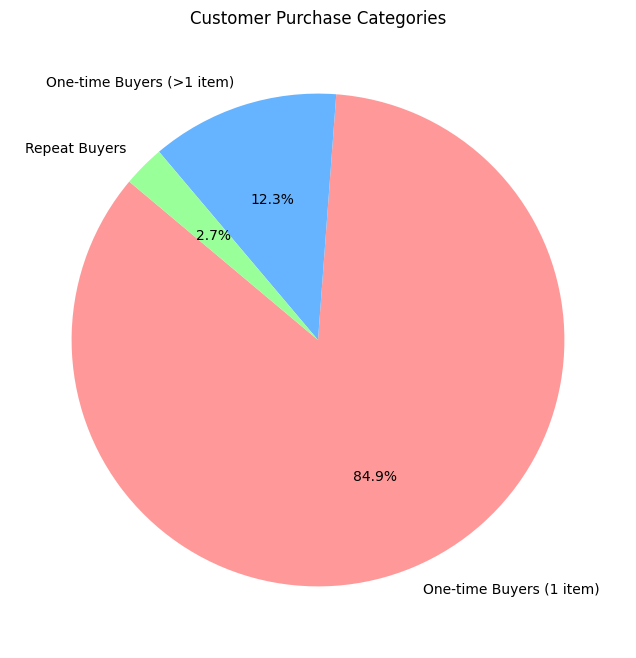

In [46]:
one_time_one_count = one_time_one_buyers['customer_unique_id'].nunique()
one_time_many_count = one_time_many_buyers['customer_unique_id'].nunique()
repeat_buyers_count = repeat_buyers_count

labels = ['One-time Buyers (1 item)', 'One-time Buyers (>1 item)', 'Repeat Buyers']
sizes = [one_time_one_count, one_time_many_count, repeat_buyers_count]
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Customer Purchase Categories')
plt.show()


##### **3.3. Customer Purchase Frequency By Product Category** 

    3.3.1 Overall Purchase Frequency By Product Category 

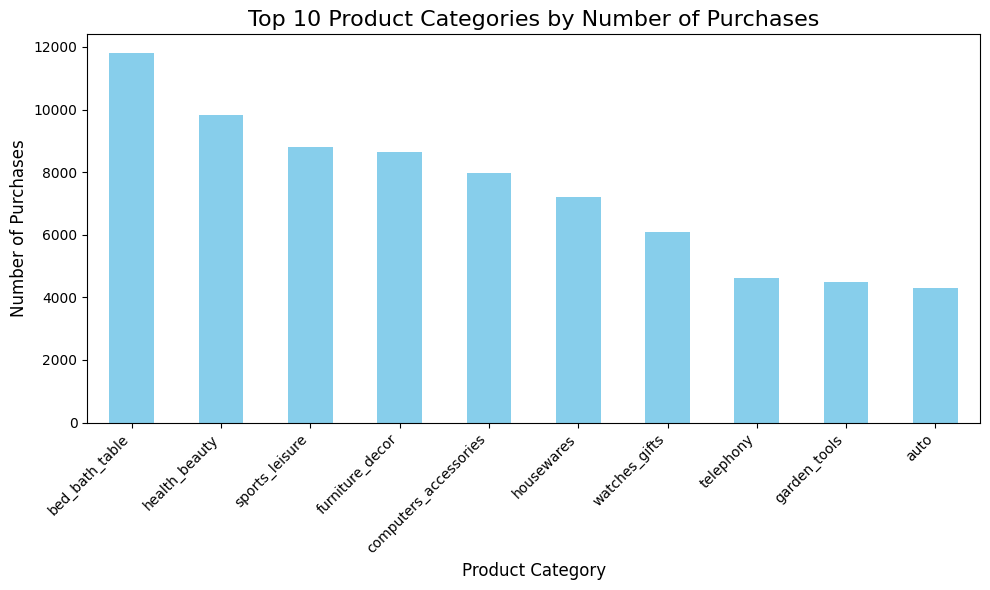

In [47]:
top_10_categories = df_olist['product_category_name'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
top_10_categories.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label
plt.title('Top 10 Product Categories by Number of Purchases', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Memutar label pada sumbu x agar tidak tumpang tindih

# Menampilkan grafik
plt.tight_layout()  # Menyesuaikan padding agar label tidak terpotong
plt.show()


    3.3.2 First-buyers Purchase Frequency By Product Category

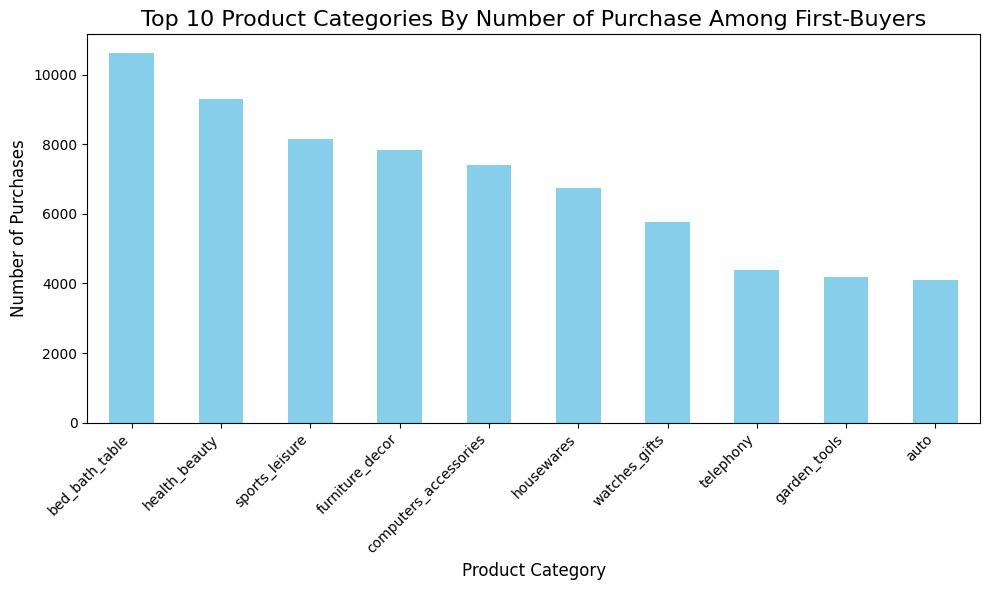

In [48]:
top_10_categories_first = one_time_buyers_df['product_category_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_categories_first.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories By Number of Purchase Among First-Buyers', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()

    3.3.3 Repeat-buyers Purchase Frequency By Product Category

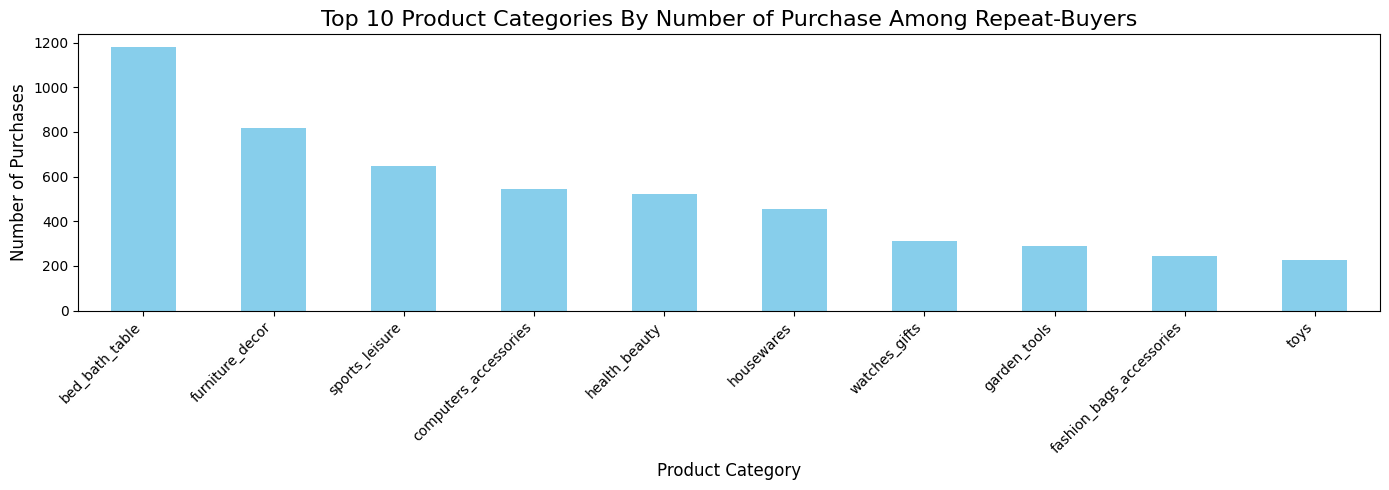

In [49]:
top_categories_repeat = repeat_buyers_df['product_category_name'].value_counts().head(10)

plt.figure(figsize=(14, 5)) 
top_categories_repeat.plot(kind='bar', color='skyblue')

plt.title('Top 10 Product Categories By Number of Purchase Among Repeat-Buyers', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

#### **3.4. Customer Purchase Frequency By Time**

    3.4.1 Monthly Purchace Frequency From 2016 - 2018

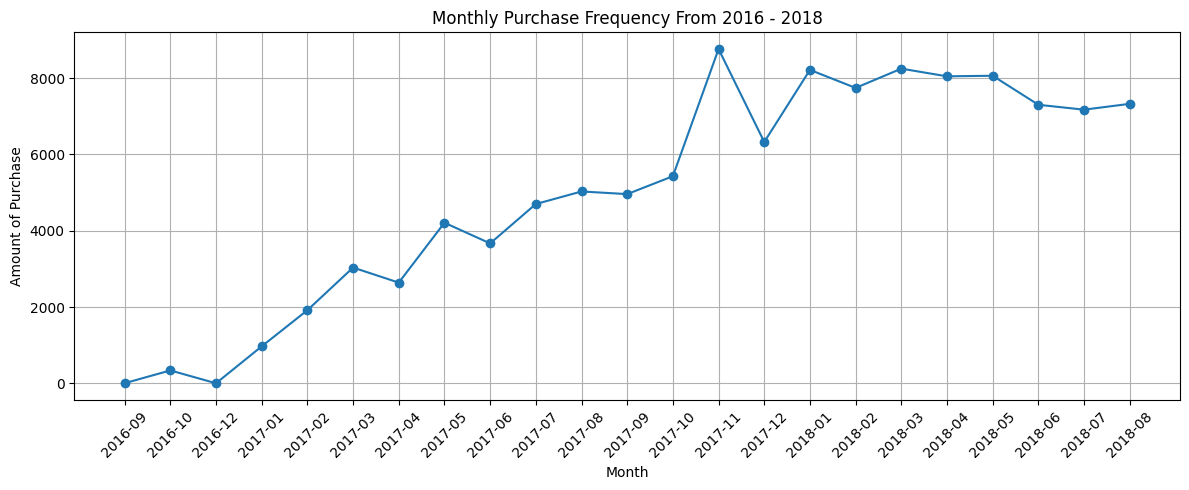

In [50]:
monthly_purchase = df_olist.copy()

monthly_purchase['purchase_month'] = monthly_purchase['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = monthly_purchase.groupby('purchase_month').size().reset_index(name='order_count')

# Visualization
plt.figure(figsize=(12, 5))
plt.plot(monthly_orders['purchase_month'].astype(str), monthly_orders['order_count'], marker='o', linestyle='-')
plt.title('Monthly Purchase Frequency From 2016 - 2018')
plt.xlabel('Month')
plt.ylabel('Amount of Purchase')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

---

Summary Insight :

---

1. Jumlah pesanan mengalami tren kenaikan yang signifikan dari September 2016 hingga November 2017, dengan puncak jumlah pesanan pada bulan November 2017 (8,761 pesanan). Setelah itu, ada fluktuasi namun tetap tinggi, dengan puncak tertinggi pada bulan Maret 2018 (8,247 pesanan).

2. Periode dari awal 2017 hingga akhir 2017 menunjukkan pertumbuhan pesanan yang konsisten, dengan lonjakan besar pada bulan-bulan tertentu. Misalnya, dari Februari 2017 (1,916 pesanan) hingga Maret 2017 (3,034 pesanan), yang menunjukkan adanya peningkatan yang cepat.


---

    3.4.2 Daily Purchace Frequency From 2016 - 2018

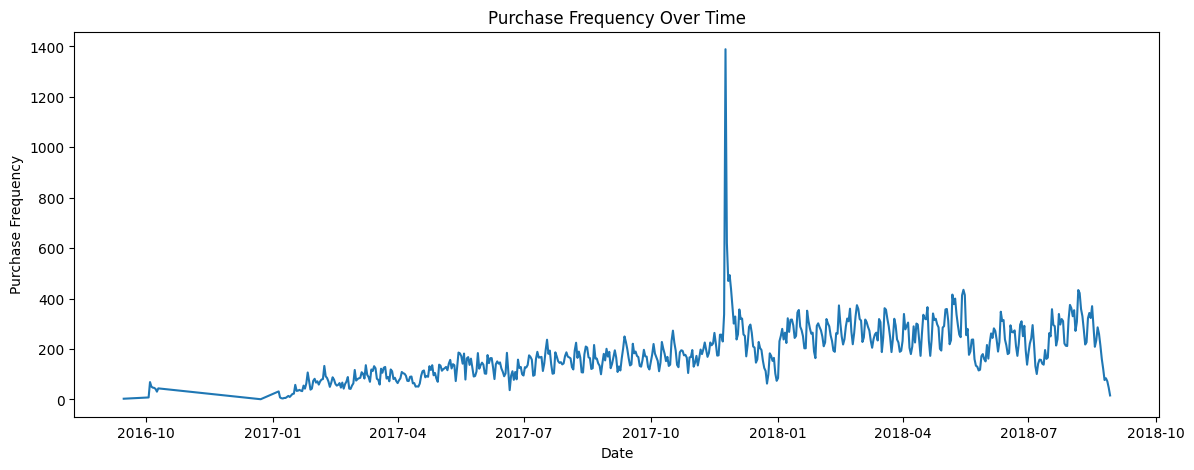

In [51]:
daily_purchase = df_olist.copy()
daily_purchase['order_purchase_date'] = daily_purchase['order_purchase_timestamp'].dt.date
daily_frequency = daily_purchase.groupby('order_purchase_date').size()

plt.figure(figsize=(14,5))
daily_frequency.plot()
plt.title('Purchase Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Purchase Frequency')
plt.show()

    3.4.3 Average Purchase Frequency by Days


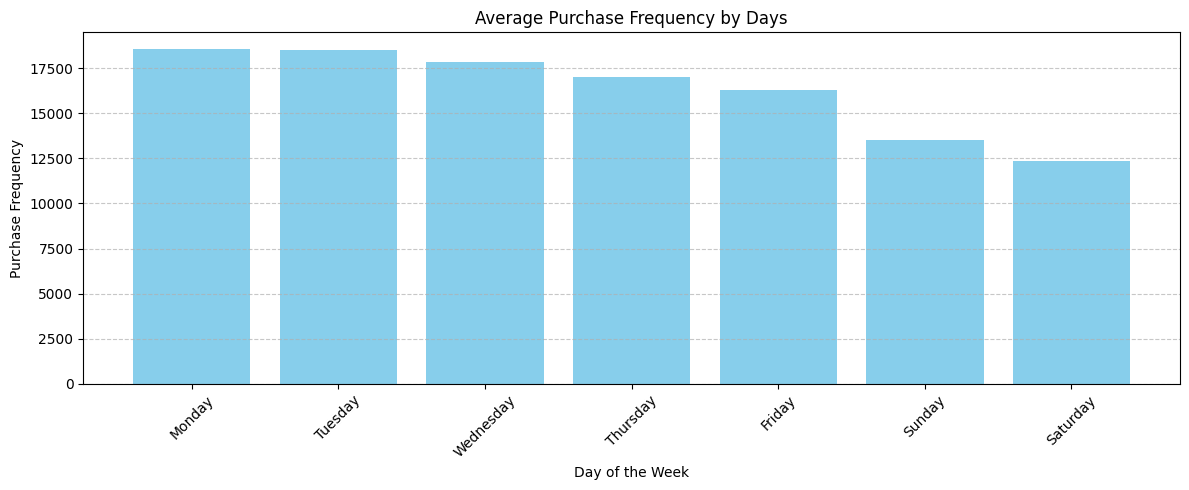

In [52]:
average_weekday_purchase = df_olist.copy()
average_weekday_purchase['order_purchase_day'] = average_weekday_purchase['order_purchase_timestamp'].dt.day_name()

weekday_frequency = average_weekday_purchase.groupby('order_purchase_day').size().reset_index(name='order_count')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_frequency['order_purchase_day'] = pd.Categorical(weekday_frequency['order_purchase_day'], categories=weekday_order, ordered=True)

weekday_frequency = weekday_frequency.sort_values(by='order_count', ascending=False)

plt.figure(figsize=(12, 5))
plt.bar(weekday_frequency['order_purchase_day'], weekday_frequency['order_count'], color='skyblue')
plt.title('Average Purchase Frequency by Days')
plt.xlabel('Day of the Week')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


---

Summary Insight :

---

1. Senin (Monday) dan Selasa (Tuesday) adalah hari dengan jumlah pesanan tertinggi, masing-masing dengan 18,547 dan 18,514 pesanan. Ini menunjukkan bahwa minggu dimulai dengan volume pesanan yang tinggi, mungkin karena pelanggan melakukan pembelian setelah akhir pekan atau memulai minggu dengan belanja.

2. Sabtu (Saturday) memiliki jumlah pesanan terendah dengan 12,321 pesanan. Hal ini mungkin disebabkan oleh adanya aktivitas akhir pekan yang mengalihkan perhatian pelanggan dari belanja online.


---

    3.4.4 Average Purchase Frequency by Hours


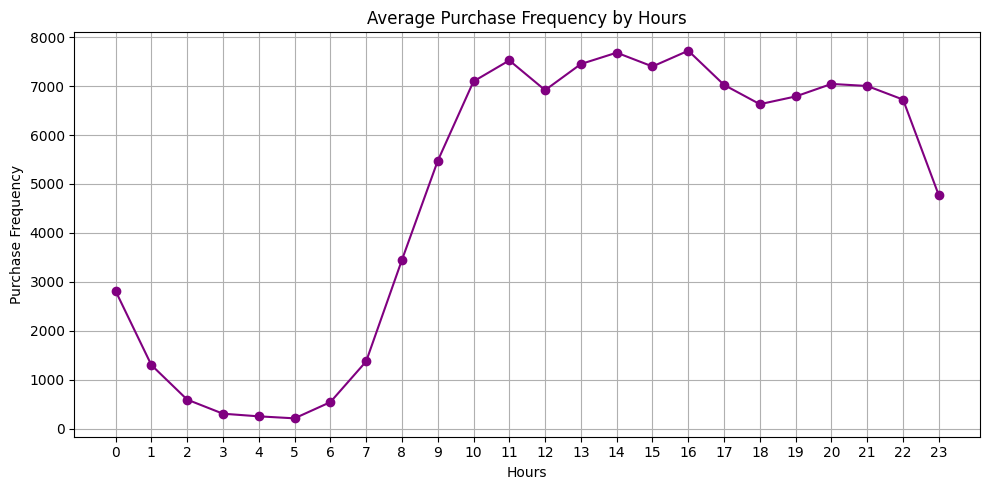

In [53]:
average_hour_purchase = df_olist.copy()
average_hour_purchase['purchase_hour'] = average_hour_purchase['order_purchase_timestamp'].dt.hour

hourly_frequency = average_hour_purchase.groupby('purchase_hour').size().reset_index(name='order_count')

plt.figure(figsize=(10, 5))
plt.plot(hourly_frequency['purchase_hour'], hourly_frequency['order_count'], marker='o', linestyle='-', color='purple')
plt.title('Average Purchase Frequency by Hours')
plt.xlabel('Hours')
plt.ylabel('Purchase Frequency')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

---

Summary Insight :

---

1. Jam dengan Pesanan Terbanyak:

    - Jam 16 (16:00 - 16:59) memiliki jumlah pesanan tertinggi dengan 7,723 pesanan. Ini menunjukkan bahwa pelanggan cenderung melakukan pembelian pada sore hari.

    - Jam 14 (14:00 - 14:59) juga menunjukkan volume pesanan yang tinggi dengan 7,678 pesanan, mengindikasikan aktivitas belanja yang tinggi di sore hari menjelang akhir kerja.

2. Jam dengan Pesanan Terendah:

    - Jam 4 (04:00 - 04:59) memiliki jumlah pesanan terendah dengan 250 pesanan. Ini menunjukkan bahwa belanja online relatif rendah pada tengah malam hingga dini hari.


---

    3.4.5 Distribution of Repeat-Buyers Purchase Periods 

In [54]:
customer_repeat_purchase = repeat_buyers_df.copy()

customer_repeat_purchase = customer_repeat_purchase.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])

customer_repeat_purchase['previous_purchase'] = customer_repeat_purchase.groupby('customer_unique_id')['order_purchase_timestamp'].shift(1)

customer_repeat_purchase['time_difference'] = (customer_repeat_purchase['order_purchase_timestamp'] - customer_repeat_purchase['previous_purchase']).dt.days

customer_repeat_purchase = customer_repeat_purchase.dropna(subset=['time_difference'])

customer_repeat_purchase[['customer_unique_id', 'order_purchase_timestamp', 'previous_purchase', 'time_difference']].sort_values(by='time_difference', ascending=False).head(5)

,customer_unique_id,order_purchase_timestamp,previous_purchase,time_difference
2352,ccafc1c3f270410521c3c6f3b249870f,2018-06-07 19:03:12,2016-10-06 19:33:34,608.0
86255,d8f3c4f441a9b59a29f977df16724f38,2018-08-24 17:52:59,2017-01-18 21:08:18,582.0
89641,94e5ea5a8c1bf546db2739673060c43f,2018-05-09 13:49:19,2016-10-05 21:10:56,580.0
66844,87b3f231705783eb2217e25851c0a45d,2018-05-04 11:14:37,2016-10-08 18:45:34,572.0
23109,4e23e1826902ec9f208e8cc61329b494,2018-03-13 22:28:21,2016-10-05 12:32:55,524.0


In [55]:
def categorize_time_difference(days):
    if days <= 7:
        return '1 Minggu'
    elif days <= 14:
        return '2 Minggu'
    elif days <= 30:
        return '1 Bulan'
    elif days <= 60:
        return '2 Bulan'
    elif days <= 90:
        return '3 Bulan'
    else:
        return 'Lebih dari 3 Bulan'

customer_repeat_purchase['time_category'] = customer_repeat_purchase['time_difference'].apply(categorize_time_difference)

time_distribution = customer_repeat_purchase['time_category'].value_counts().reset_index()

time_distribution.columns = ['time_category', 'count']

C:\Users\user\AppData\Local\Temp\ipykernel_6384\1378412912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_category', y='count', data=time_distribution, palette='viridis')


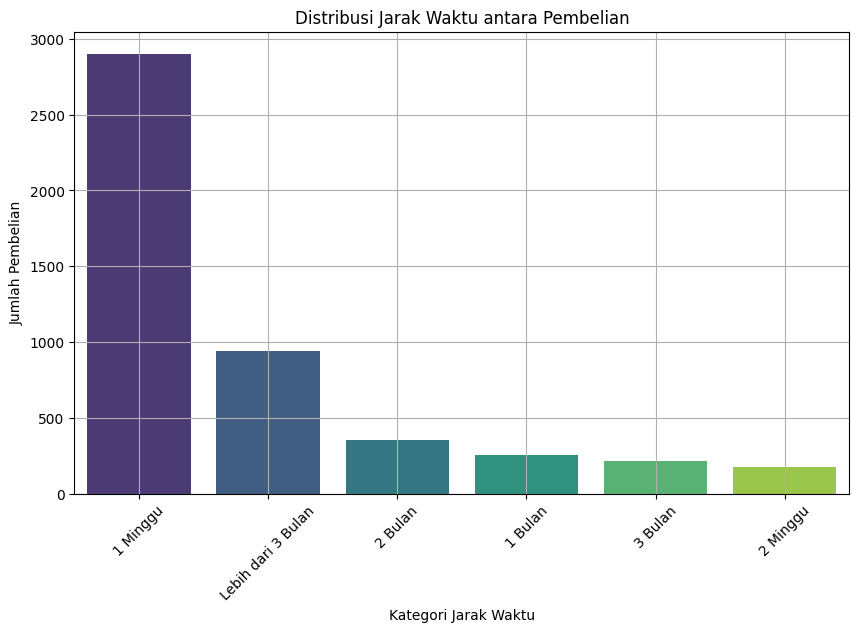

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='time_category', y='count', data=time_distribution, palette='viridis')
plt.title('Distribusi Jarak Waktu antara Pembelian')
plt.xlabel('Kategori Jarak Waktu')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### **3.5. Customer Purchase Frequency By Customer City**

    3.5.1 Overall Purchase Frequency By Customer City

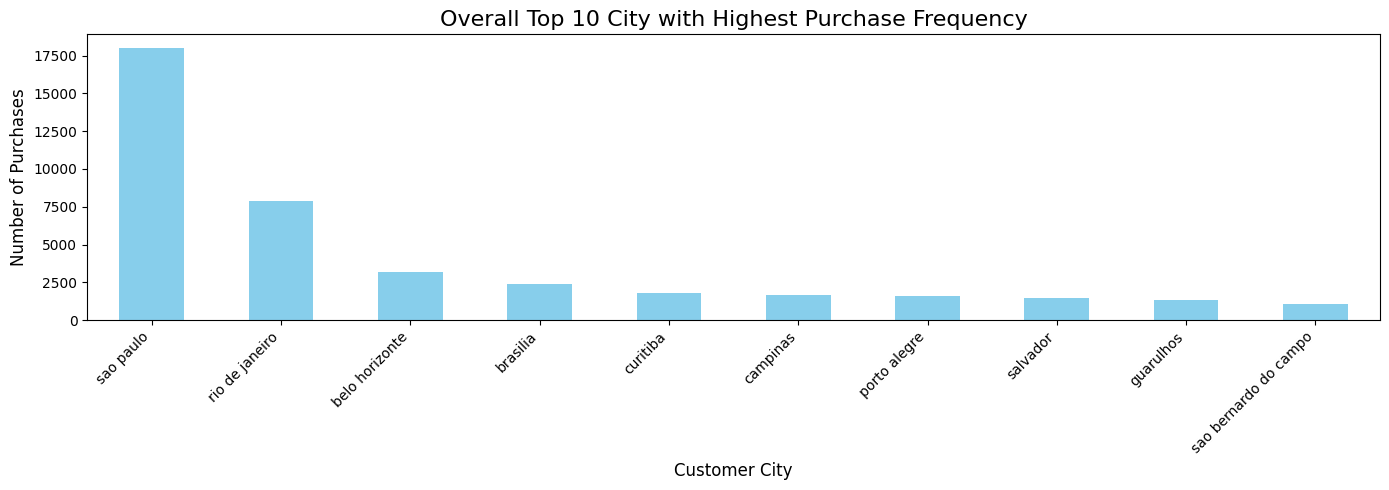

In [57]:
overall_purchase_by_city = df_olist['customer_city'].value_counts().head(10)  # Menampilkan 10 kota teratas

plt.figure(figsize=(14, 5))
overall_purchase_by_city.plot(kind='bar', color='skyblue')

plt.title('Overall Top 10 City with Highest Purchase Frequency', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


    3.5.2 First-Buyers Purchase Frequency By Customer City

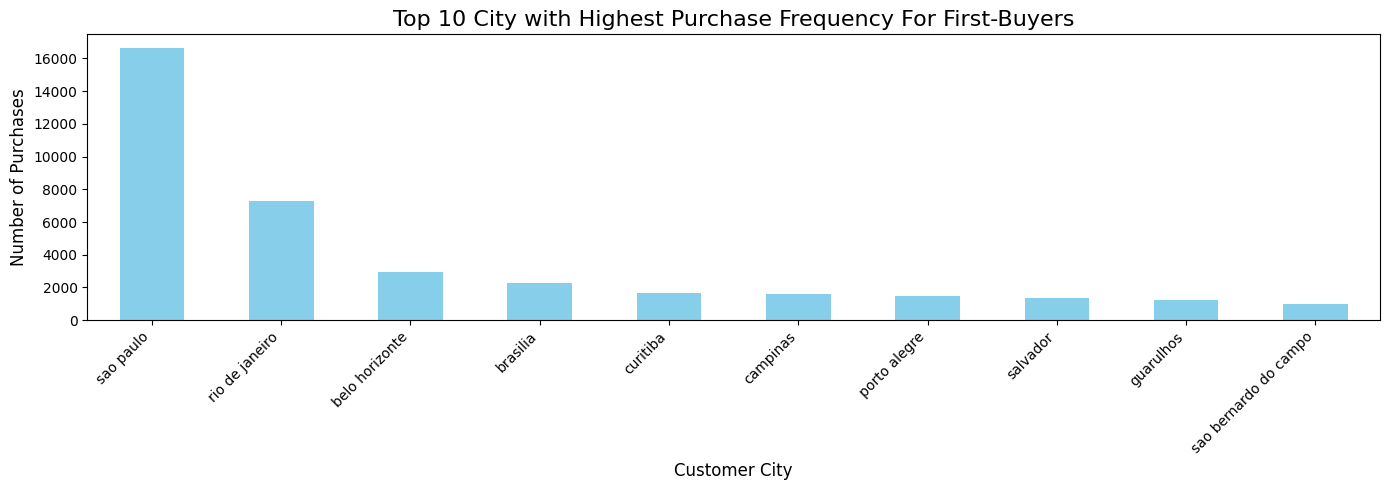

In [58]:
first_purchase_by_city = one_time_buyers_df['customer_city'].value_counts().head(10)

plt.figure(figsize=(14, 5))
first_purchase_by_city.plot(kind='bar', color='skyblue')

plt.title('Top 10 City with Highest Purchase Frequency For First-Buyers', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

    3.5.3 Repeat-Buyers Purchase Frequency By Customer City

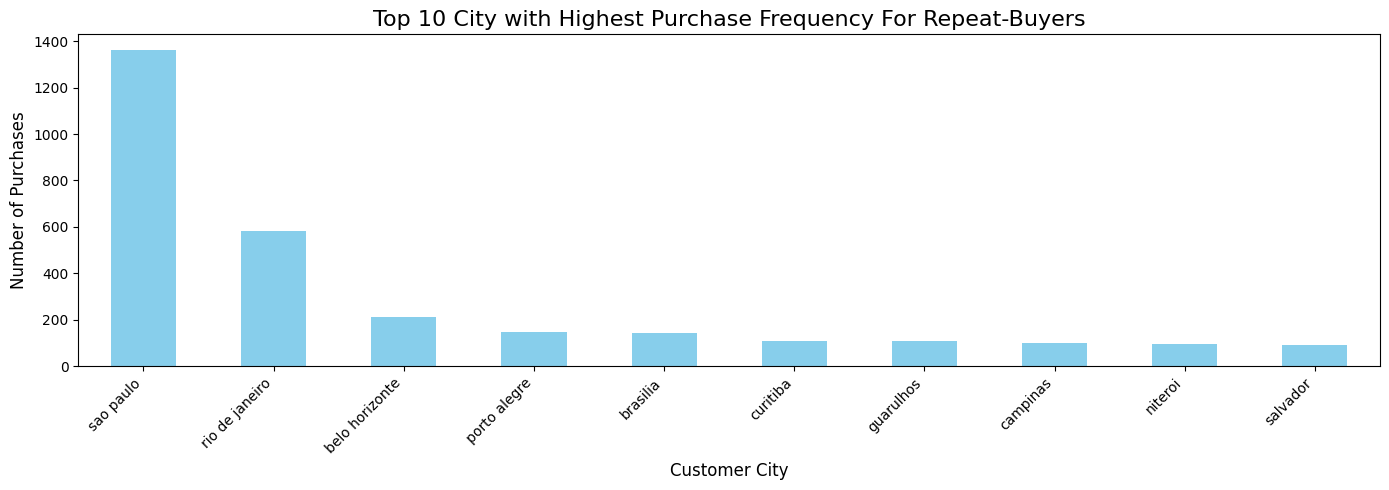

In [59]:
repeat_purchase_by_city = repeat_buyers_df['customer_city'].value_counts().head(10)  # Menampilkan 10 kota teratas

plt.figure(figsize=(14, 5))
repeat_purchase_by_city.plot(kind='bar', color='skyblue')

plt.title('Top 10 City with Highest Purchase Frequency For Repeat-Buyers', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---

Summary Insight :

---

1. Pembelian terbanyak berdasarkan kota didominasi oleh Sao Paulo 
2. Pembelian terbanyak oleh pembeli yang baru melakukan pembelian untuk pertama kalinya juga didominasi oleh sao paulo
3. Pembelian terbanyak oleh pembeli yang melakukan pembelian berulang juga didominasi oleh sao paulo
4. Mayoritas pembeli berasal dari kota sao paulo


---

#### **3.6. Customer Purchase Frequency By Customer State**

    3.6.1 Overall Purchase Frequency By Customer State

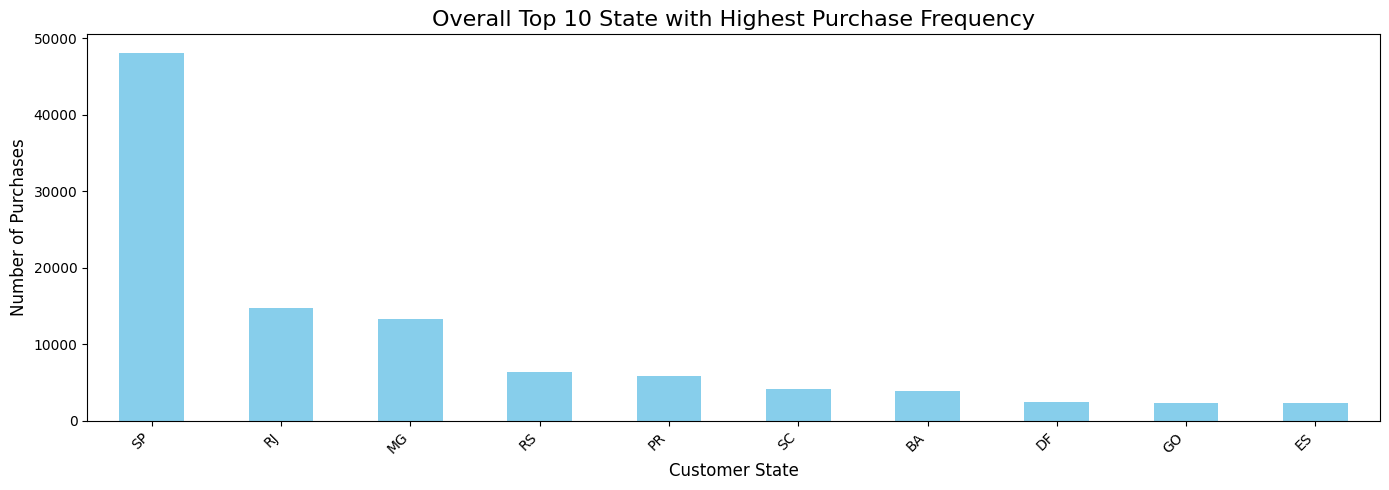

In [60]:
overall_purchase_by_state = df_olist['customer_state'].value_counts().head(10)  # Menampilkan 10 kota teratas

plt.figure(figsize=(14, 5))
overall_purchase_by_state.plot(kind='bar', color='skyblue')

plt.title('Overall Top 10 State with Highest Purchase Frequency', fontsize=16)
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

    3.6.1 First-Buyers Purchase Frequency By Customer State 

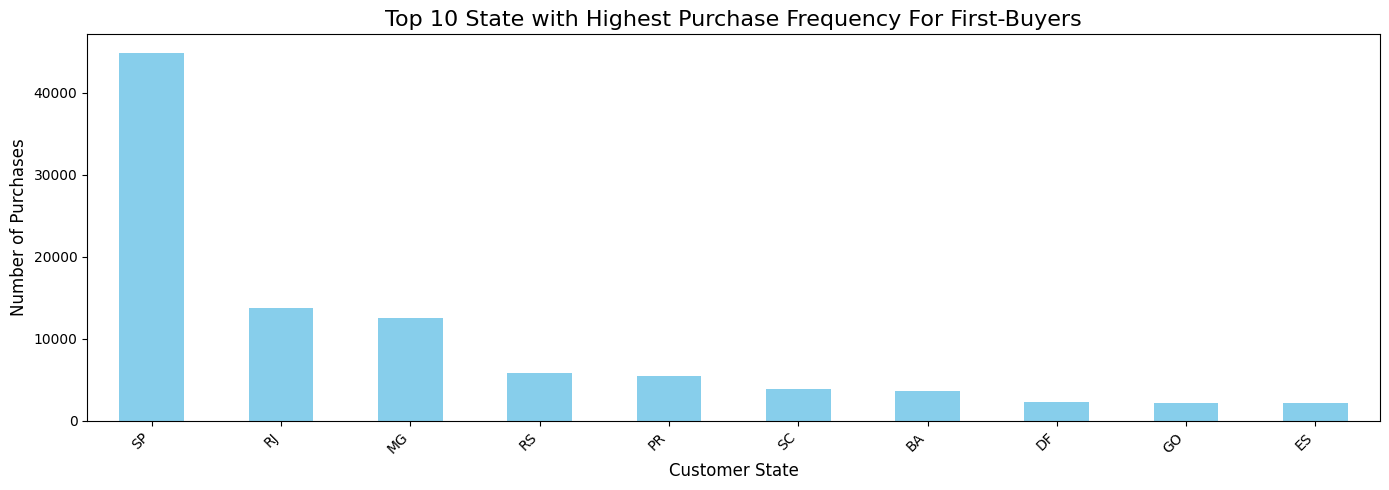

In [61]:
first_purchase_by_state = one_time_buyers_df['customer_state'].value_counts().head(10)  # Menampilkan 10 kota teratas

plt.figure(figsize=(14, 5))
first_purchase_by_state.plot(kind='bar', color='skyblue')

plt.title('Top 10 State with Highest Purchase Frequency For First-Buyers', fontsize=16)
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

    3.6.2 Repeat-Buyers Purchase Frequency By Customer State 

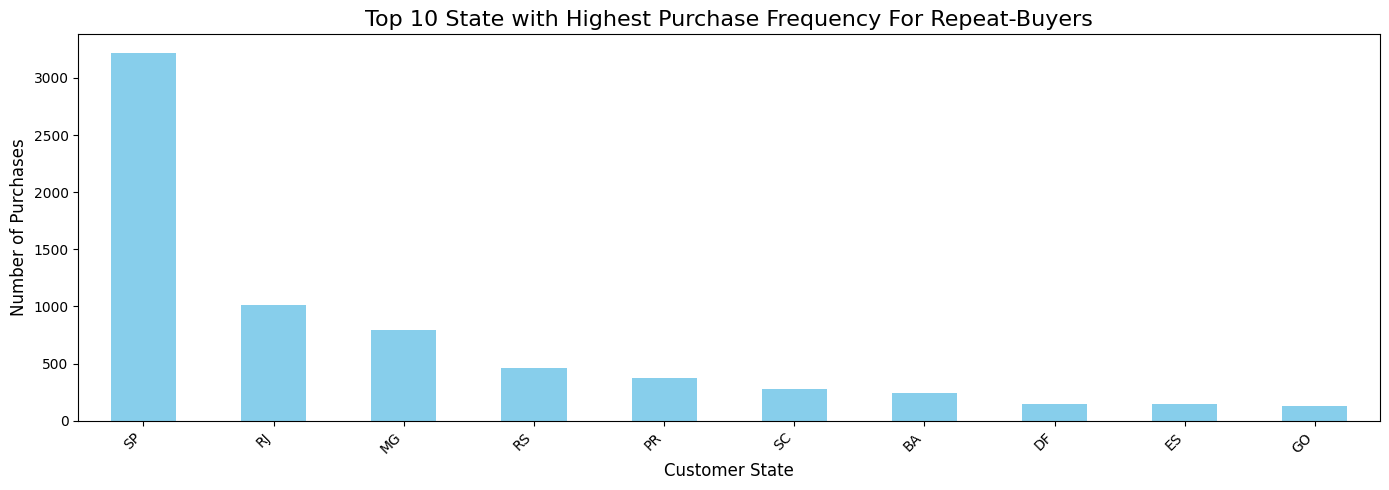

In [62]:
repeat_purchase_by_state = repeat_buyers_df['customer_state'].value_counts().head(10)  # Menampilkan 10 kota teratas

plt.figure(figsize=(14, 5))
repeat_purchase_by_state.plot(kind='bar', color='skyblue')

plt.title('Top 10 State with Highest Purchase Frequency For Repeat-Buyers', fontsize=16)
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---

Summary Insight :

---

1. Pembelian terbanyak berdasarkan wilayah didominasi oleh SP 
2. Pembelian terbanyak oleh pembeli yang baru melakukan pembelian untuk pertama kalinya juga didominasi oleh SP
3. Pembelian terbanyak oleh pembeli yang melakukan pembelian berulang juga didominasi oleh SP
4. Mayoritas pembeli berasal dari wilayah SP


---

#### **3.7 Customer Distribution By State**

    3.7.1 Overall Customers Distribution

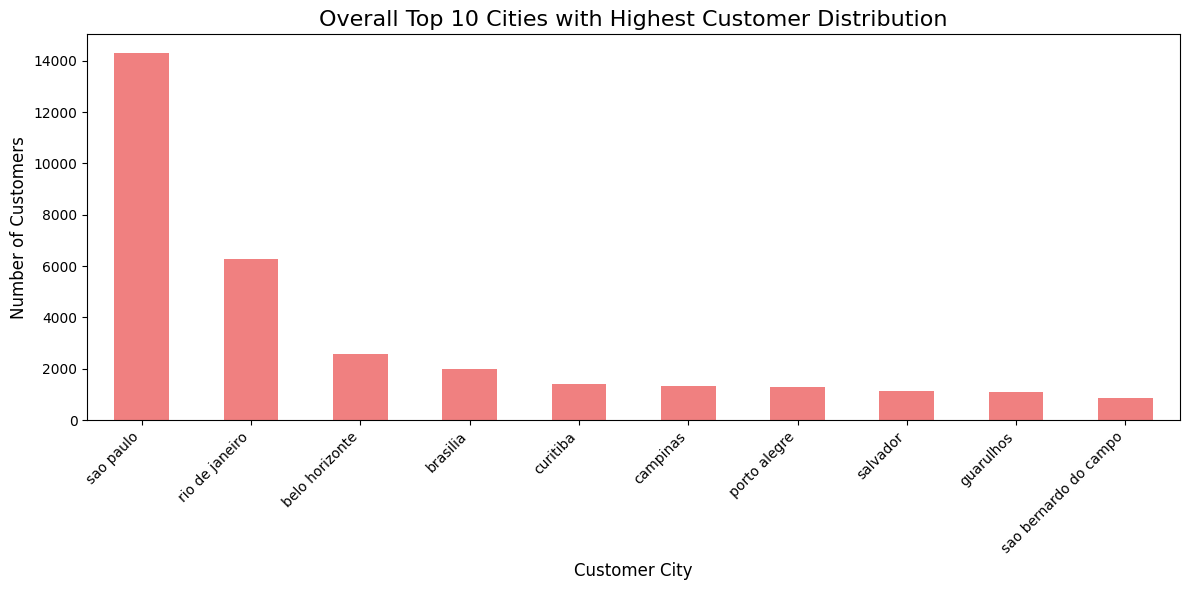

In [63]:
city_customer_counts = df_olist.groupby('customer_city')['customer_unique_id'].nunique()

top_10_city_customer_counts = city_customer_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_city_customer_counts.plot(kind='bar', color='lightcoral')

# Menambahkan judul dan label
plt.title('Overall Top 10 Cities with Highest Customer Distribution', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Memutar label kota di sumbu x agar lebih terbaca
plt.xticks(rotation=45, ha='right')

# Menampilkan grafik
plt.tight_layout()
plt.show()


    5.2. First-Buyers Customer Distribution

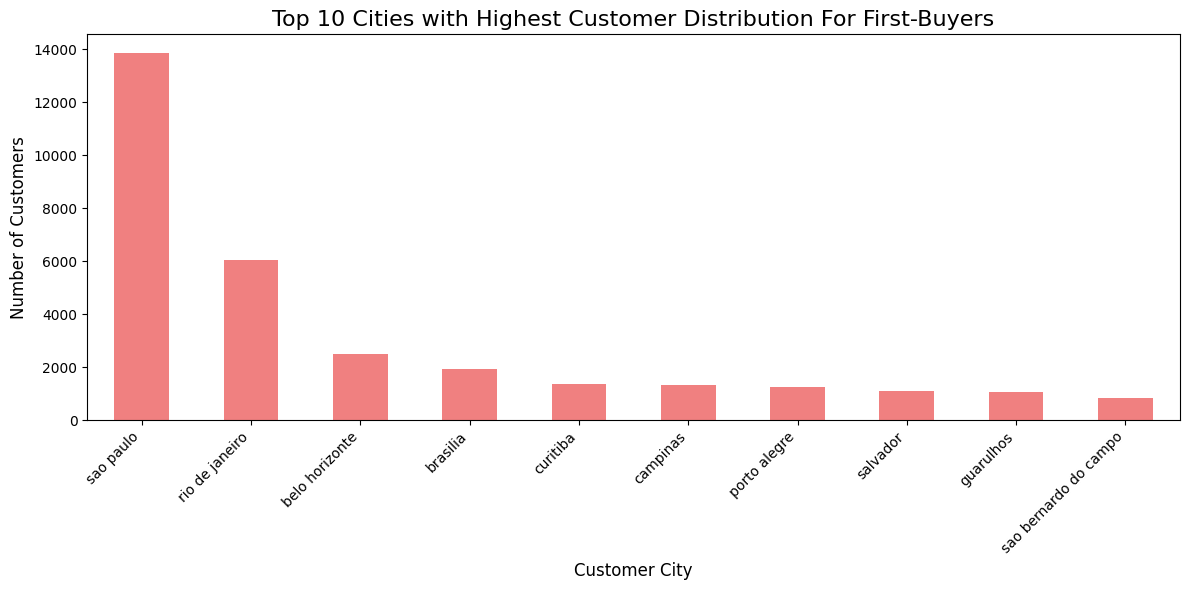

In [64]:
city_customer_counts = one_time_buyers_df.groupby('customer_city')['customer_unique_id'].nunique()

top_10_city_customer_counts = city_customer_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_city_customer_counts.plot(kind='bar', color='lightcoral')

# Menambahkan judul dan label
plt.title('Top 10 Cities with Highest Customer Distribution For First-Buyers', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Memutar label kota di sumbu x agar lebih terbaca
plt.xticks(rotation=45, ha='right')

# Menampilkan grafik
plt.tight_layout()
plt.show()


    5.3. Repeat Buyers Customer Distribution

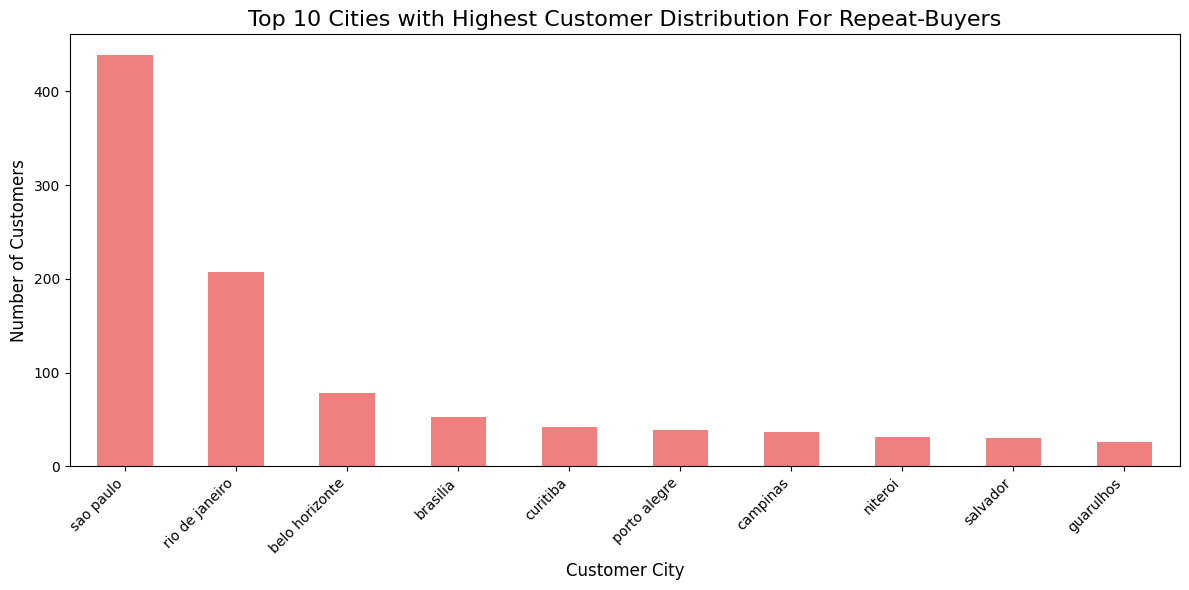

In [65]:
city_customer_counts = repeat_buyers_df.groupby('customer_city')['customer_unique_id'].nunique()

top_10_city_customer_counts = city_customer_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_city_customer_counts.plot(kind='bar', color='lightcoral')

# Menambahkan judul dan label
plt.title('Top 10 Cities with Highest Customer Distribution For Repeat-Buyers', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Memutar label kota di sumbu x agar lebih terbaca
plt.xticks(rotation=45, ha='right')

# Menampilkan grafik
plt.tight_layout()
plt.show()


---

Summary Insight :

---

1. Mayoritas pembeli, baik pembeli pertama kali dan pembeli berulang berasal dari kota sao paulo kemudian diikuti oleh kota rio de jeneiro
2. Distribusi pembeli memiliki hubungan yang linear berdasarkan frekuensi jumlah pembelian yang dilakukan yang juga didominasi oleh kota sao paulo


---

#### **3.8. Customer Purchase Review Score**

    3.8.1 Overall Purchase Review Score 

C:\Users\user\AppData\Local\Temp\ipykernel_6384\3366022136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Review_Score', y='Count', data=review_counts, palette='viridis')


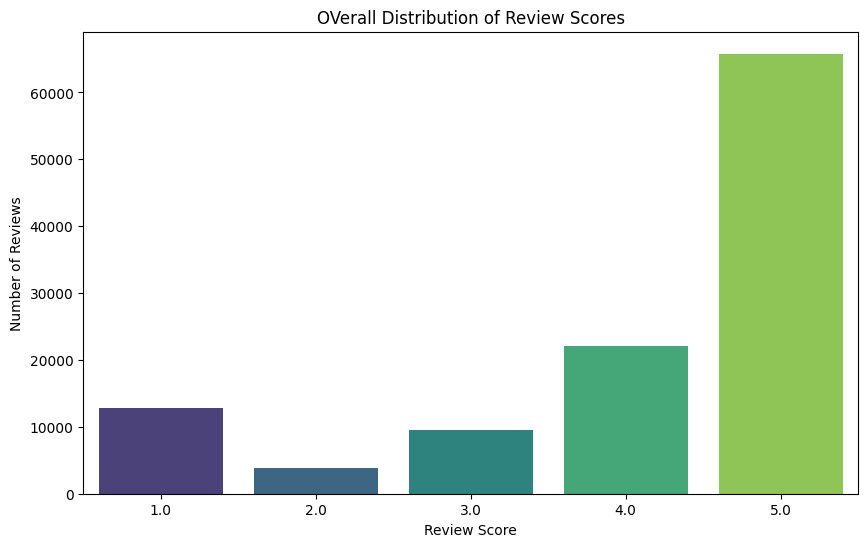

In [66]:
review_counts = df_olist['review_score'].value_counts().reset_index()
review_counts.columns = ['Review_Score', 'Count']
review_counts = review_counts.sort_values(by='Review_Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Review_Score', y='Count', data=review_counts, palette='viridis')
plt.title('OVerall Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()


    3.8.2 First-Buyers Purchase Review Score

C:\Users\user\AppData\Local\Temp\ipykernel_6384\3851728215.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Review_Score', y='Count', data=review_counts, palette='viridis')


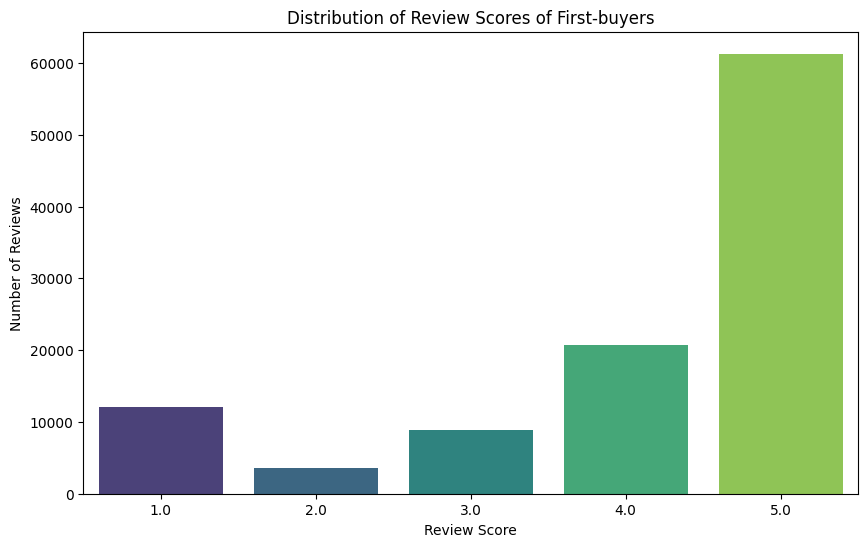

In [67]:
review_counts = one_time_buyers_df['review_score'].value_counts().reset_index()
review_counts.columns = ['Review_Score', 'Count']
review_counts = review_counts.sort_values(by='Review_Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Review_Score', y='Count', data=review_counts, palette='viridis')
plt.title('Distribution of Review Scores of First-buyers')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()


    3.8.3 Repeat-Buyers Purchase Review Score

C:\Users\user\AppData\Local\Temp\ipykernel_6384\2371290389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Review_Score', y='Count', data=review_counts, palette='viridis')


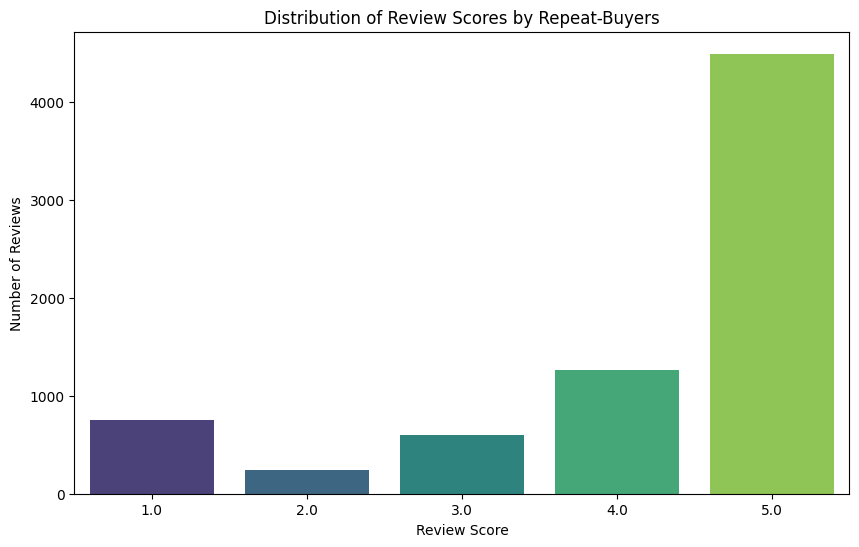

In [68]:
review_counts = repeat_buyers_df['review_score'].value_counts().reset_index()
review_counts.columns = ['Review_Score', 'Count']
review_counts = review_counts.sort_values(by='Review_Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Review_Score', y='Count', data=review_counts, palette='viridis')
plt.title('Distribution of Review Scores by Repeat-Buyers')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()

#### **3.9 Distribution of Customer Payment**

    3.9.1 Overall Payment-Type Distribution

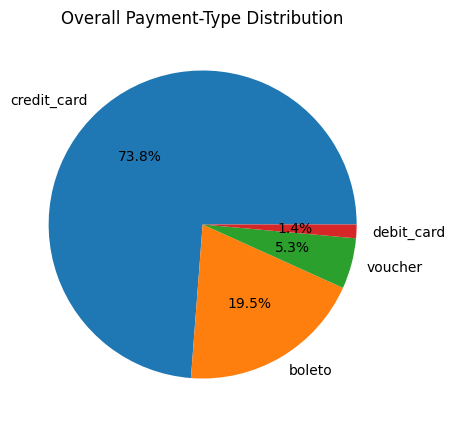

In [69]:
payment_type_counts = df_olist['payment_type'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('Overall Payment-Type Distribution')
plt.show()


    3.9.2 First-Buyers Payment-Type Distribution

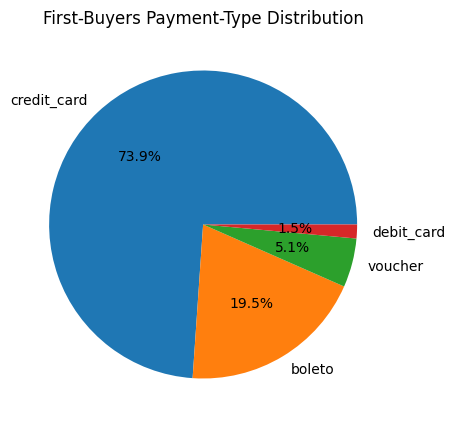

In [70]:
payment_type_counts = one_time_buyers_df['payment_type'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 5))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('First-Buyers Payment-Type Distribution')
plt.show()


    3.9.3 Repeat-Buyers Payment-Type Distribution

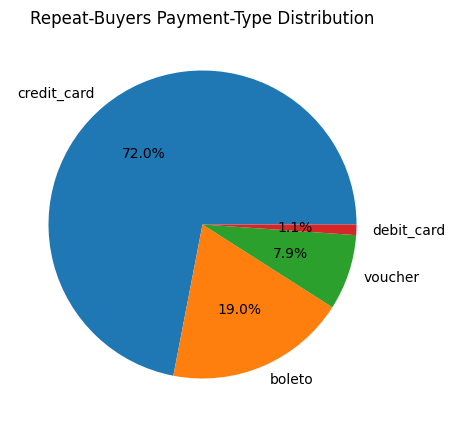

In [71]:
payment_type_counts = repeat_buyers_df['payment_type'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 5))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('Repeat-Buyers Payment-Type Distribution')
plt.show()

---

Summary Insight :

---

1. Mayoritas pembeli, baik pembeli pertama kali dan pembeli berulang memilih untuk melakukan pembayaran melakukan credit card dan kemudian boleto
2. Secara keseluruhan opsi pembayaran menggunakan credit card paling banyak diminati oleh customer dengan proporsi jumlah mencapai 73.8 %


---

    3.9.4 Overall Payment-Installment Distribution

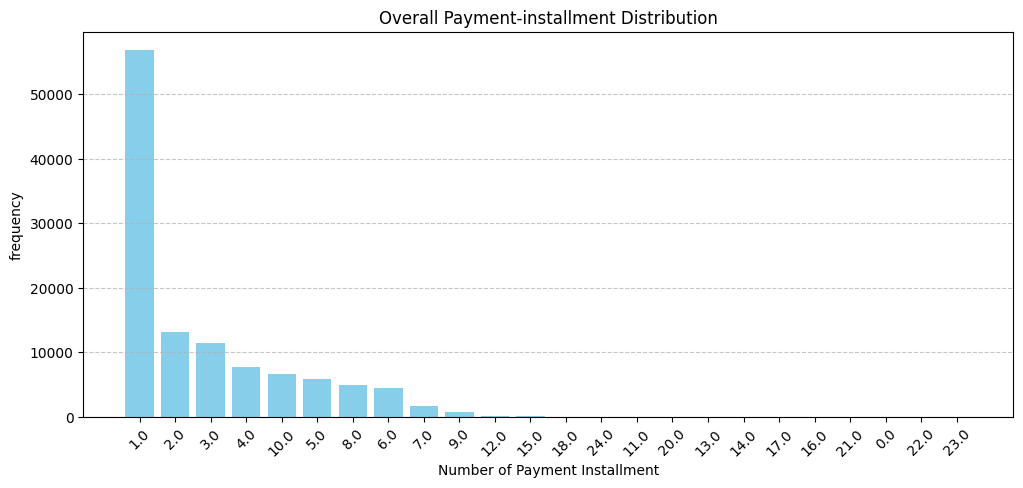

In [72]:
payment_installments_counts = df_olist['payment_installments'].value_counts().reset_index()
payment_installments_counts.columns = ['payment_installments', 'count']  # Ganti nama kolom untuk kemudahan

payment_installments_counts = payment_installments_counts.sort_values(by='count', ascending=False)

# Buat bar chart
plt.figure(figsize=(12, 5))
plt.bar(payment_installments_counts['payment_installments'].astype(str), payment_installments_counts['count'], color='skyblue')
plt.xlabel('Number of Payment Installment')
plt.ylabel('frequency')
plt.title('Overall Payment-installment Distribution')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


    3.9.5 First-Buyers Payment-Installment Distribution

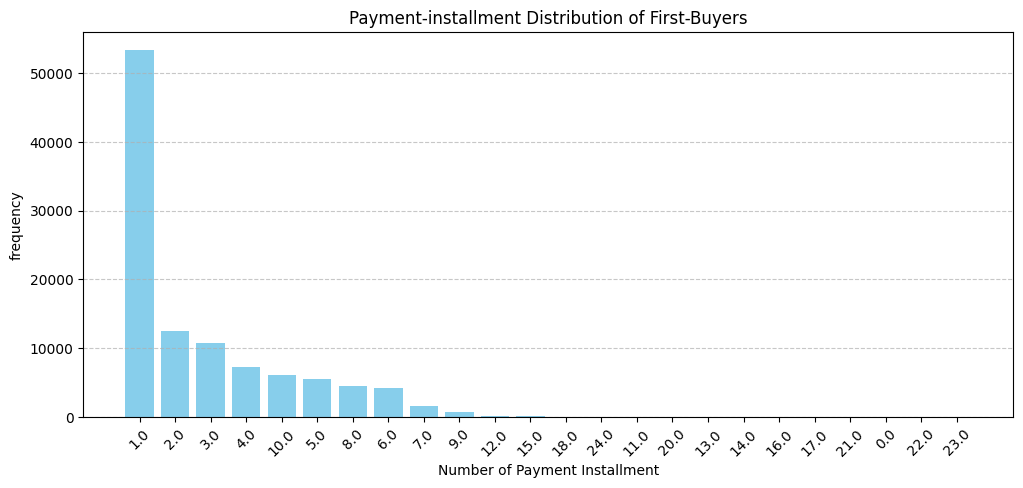

In [73]:
payment_installments_counts = one_time_buyers_df['payment_installments'].value_counts().reset_index()
payment_installments_counts.columns = ['payment_installments', 'count']  # Ganti nama kolom untuk kemudahan

payment_installments_counts = payment_installments_counts.sort_values(by='count', ascending=False)

# Buat bar chart
plt.figure(figsize=(12, 5))
plt.bar(payment_installments_counts['payment_installments'].astype(str), payment_installments_counts['count'], color='skyblue')
plt.xlabel('Number of Payment Installment')
plt.ylabel('frequency')
plt.title('Payment-installment Distribution of First-Buyers')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


    3.9.6 Repeat-Buyers Payment-Installment Distribution

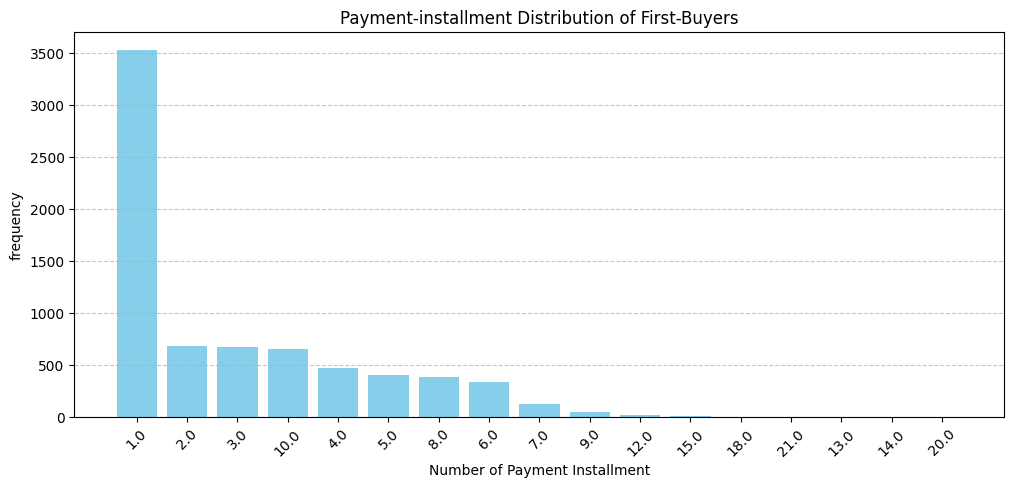

In [74]:
payment_installments_counts = repeat_buyers_df['payment_installments'].value_counts().reset_index()
payment_installments_counts.columns = ['payment_installments', 'count']  # Ganti nama kolom untuk kemudahan

payment_installments_counts = payment_installments_counts.sort_values(by='count', ascending=False)

# Buat bar chart
plt.figure(figsize=(12, 5))
plt.bar(payment_installments_counts['payment_installments'].astype(str), payment_installments_counts['count'], color='skyblue')
plt.xlabel('Number of Payment Installment')
plt.ylabel('frequency')
plt.title('Payment-installment Distribution of First-Buyers')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


---

Summary Insight :

---

1. Mayoritas pembeli, baik pembeli pertama kali dan pembeli berulang memilih untuk mengambil payment installment dari credit card sebanyak 1 kali, 2 kali dan 3 kali
2. Payment_installment sebanyak 1 kali dipilih dengan frequency sebesar lebih dari 50.000


---

##### **3.10. Customer Retention Rate Analysis**

In [96]:
# Tambahkan kolom bulan dan tahun pembelian
df_retention = df_olist.copy()

df_retention['purchase_month'] = df_retention['order_purchase_timestamp'].dt.to_period('M')
df_retention['delivery_month'] = df_retention['order_delivered_customer_date'].dt.to_period('M')

# Tentukan bulan dan tahun referensi untuk analisis
reference_month = df_retention['purchase_month'].max()

In [ ]:
reference_month

In [97]:
# Buat tabel pivot untuk menghitung jumlah pesanan per pelanggan per bulan
pivot_table = pd.pivot_table(df_retention, index='customer_id', columns='purchase_month', values='order_id', aggfunc='count', fill_value=0)

# Tentukan retention bulan
retention_df = pivot_table.copy()
retention_df = retention_df.apply(lambda x: x > 0, axis=1)  # Konversi ke boolean
retention_df = retention_df.cumsum(axis=1)  # Hitung jumlah bulan aktif

# Hitung retention rate
retention_rate = retention_df.apply(lambda x: x / len(pivot_table.columns), axis=1)  # Persentase pelanggan aktif per bulan
retention_rate = retention_rate.mean()  # Rata-rata retention rate


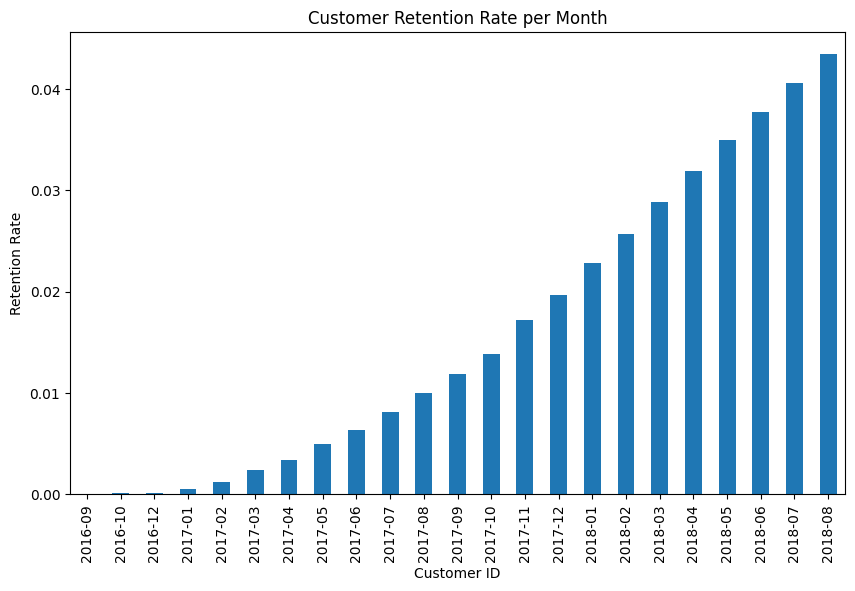

In [98]:
# Plot retention rate
retention_rate.plot(kind='bar', figsize=(10, 6))
plt.title('Customer Retention Rate per Month')
plt.xlabel('Customer ID')
plt.ylabel('Retention Rate')
plt.show()
